In [34]:
import xarray as xr  
import pandas as pd  
import glob 
import os 
import matplotlib.pyplot as plt 
import numpy as np 

# A notebook to analyse results in the results/ dir. These results come from a compression experiment comparing wavelet and non wavelet compression methods on a 3D electronic potential dataset from the GYSELA code. 

In [35]:
from xarray_utils import csv_dims_to_lists, xarray_results_dataset

In [36]:
_dir = os.getcwd() 

In [37]:
results_dir = _dir + "/results"
phi_3D_results = glob.glob(results_dir + '/rec_Phi3D_*')
phi_3D_results.sort() 

In [38]:
images_dir = _dir + '/images/'

In [39]:
xarray_datasets = [] 

for rec_dir in phi_3D_results:
    methods, data, diags = csv_dims_to_lists(rec_dir + '/') 
    ds = xarray_results_dataset(rec_dir + '/', data_dimension=3) 
    xarray_datasets.append(ds) 


In [40]:
full_ds = xr.concat(xarray_datasets, dim='data') 

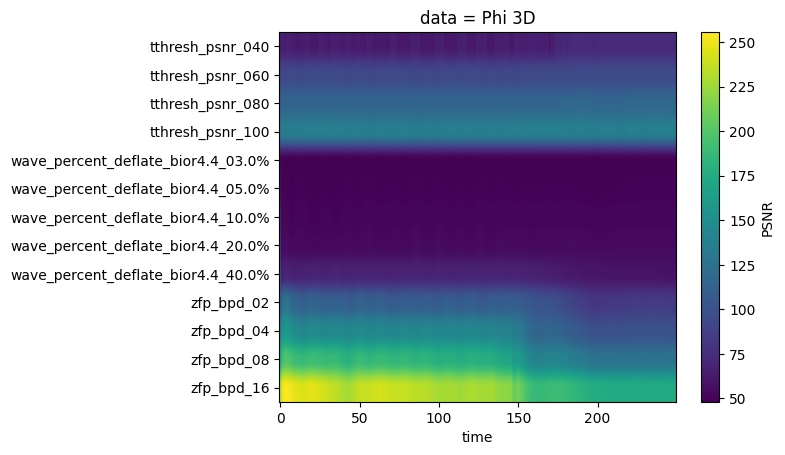

In [41]:
to_plot = full_ds.psnr.mean(dim='diag').values
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi 3D') 
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label("PSNR")  

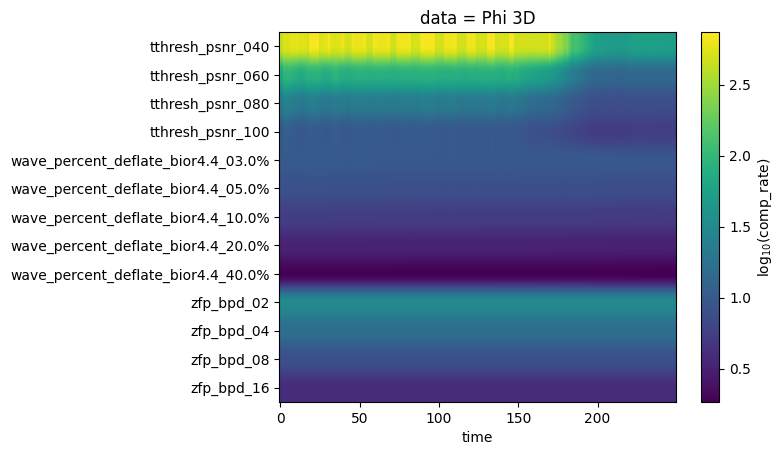

In [42]:
to_plot = np.log10(full_ds.comp_rate.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi 3D')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(comp_rate)')  

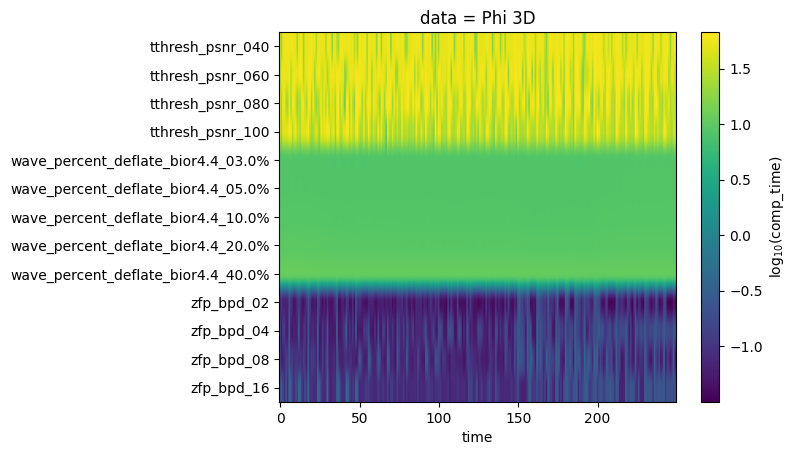

In [43]:
to_plot = np.log10(full_ds.comp_time.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi 3D')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(comp_time)')  

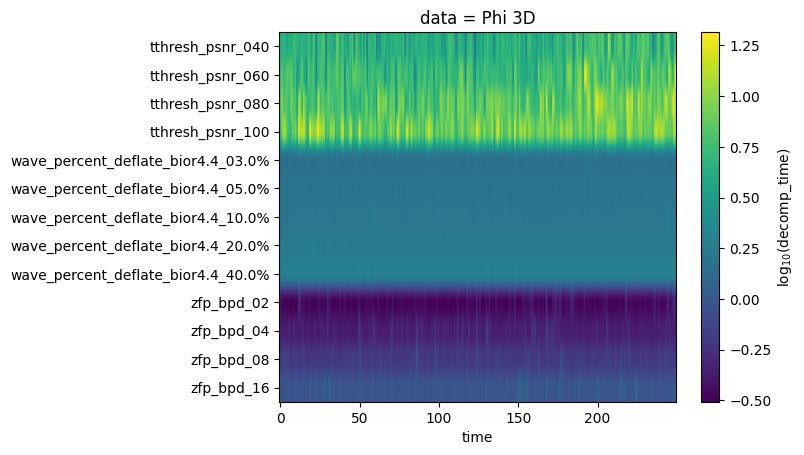

In [44]:
to_plot = np.log10(full_ds.decomp_time.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi 3D')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(decomp_time)')  